In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import netCDF4
import pandas as pd
from sklearn.utils import shuffle

In [45]:
test = np.load('/fast/gmooers/Preprocessed_Data/Centered_W_100/Space_Time_W_Test.npy')
Max_Scalar = np.load('/fast/gmooers/Preprocessed_Data/Centered_W_100/Space_Time_Max_Scalar.npy')
Min_Scalar = np.load('/fast/gmooers/Preprocessed_Data/Centered_W_100/Space_Time_Min_Scalar.npy')
test = np.interp(test, (0, 1), (Min_Scalar, Max_Scalar))

In [46]:
y_labels = np.zeros(shape=(len(test)))
y_labels[:] = np.nan

In [47]:
for i in range(len(test)):
    sample = test[i,:,:].ravel()
    y_labels[i] = np.var(sample)

In [48]:
print(np.max(y_labels))
print(np.min(y_labels))

4.219957526808455
0.0


Text(0.5, 1.0, 'Histogram')

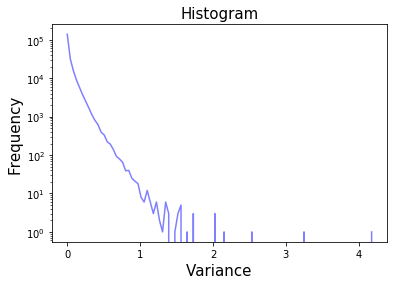

In [49]:
shared_bins = np.histogram_bin_edges(y_labels, bins=100)
freq, edges = np.histogram(y_labels, bins = shared_bins)
fig, ax = plt.subplots()
    
plt.plot(edges[:-1], freq, alpha = 0.5, color = 'blue')

plt.xlabel('Variance', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.yscale("log")
plt.title('Histogram', fontsize = 15)

In [50]:
rescaled_y = np.interp(y_labels, (y_labels.min(), y_labels.max()), (0, +1))

Text(0.5, 1.0, 'Histogram')

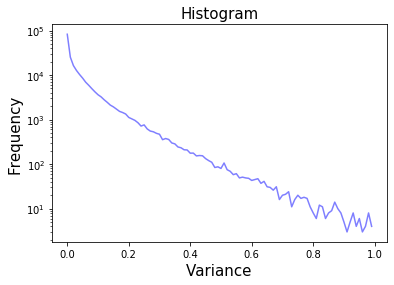

In [51]:
shared_bins = np.histogram_bin_edges(rescaled_y, bins=100)
freq, edges = np.histogram(y_labels, bins = shared_bins)
fig, ax = plt.subplots()
    
plt.plot(edges[:-1], freq, alpha = 0.5, color = 'blue')

plt.xlabel('Variance', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.yscale("log")
plt.title('Histogram', fontsize = 15)

In [52]:
np.save("/fast/gmooers/Preprocessed_Data/Centered_W_100/Y_Test_Var", rescaled_y)